In [100]:
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Generating fake data by hand

Similar to the kidney stone example from the lecture (table 1), the goal is to
create two experimental datasets. Both should have two treatments (e.g., A
and B), but the first has two subcategories as in the lecture while the second
has three. Again, one treatment should be better in all subcategories, while the
other treatment should be better overall.

## 1.2 Using your computer

Instead of validating the result by hand, in this exercise, we want to use python
and pandas:
• Using your results from task section 1.1, put the raw data (patients suc-
cessfully treated and patients treated) data in a pandas data frame and
1
save it as a .csv or Excel file. The result should contain 4 columns (suc-
cesses treatment A, total patients A, successes treatment B, total patients
B) for each individual treatment, not the total number over all trea
tments.

In [98]:
simpsons1 = {
    'subCategory': ['Subcategory 1', 'Subcategory 2'],
    'successA': [71, 2],
    'totalA': [120, 3],
    'successB': [1, 79],
    'totalB': [3, 120]
}

df1 = pd.DataFrame(simpsons1)
df1.to_csv('simpsons1.csv')

In [99]:

simpsons2 = {
    'subCategory': ['Subcategory 1', 'Subcategory 2', 'Subcategory 3'],
    'successA': [1, 2, 89],
    'totalA': [22, 4, 128],
    'successB': [18, 3, 25],
    'totalB': [109, 5, 28]
}

df2 = pd.DataFrame(simpsons2)
df2.to_csv('simpsons2.csv')

• Read in your data file. Compute the percentage success for each sub/category
and the overall treatment success. Write those results in a new data
frame (should have two columns and the number of sub-categories plus
overall performance rows).

In [92]:
df_pct1 = pd.read_csv('simpsons1.csv')
overall_successA = df_pct1['successA'].sum() / df_pct1['totalA'].sum()
print(overall_successA)
overall_successB = df_pct1['successB'].sum() / df_pct1['totalB'].sum()
print(overall_successB)
overall_row = {'subCategory': 'Overall',
               'successA': 0,
               'totalA': 0,
               'successB': 0,
               'totalB': 0
              }
df_pct1.loc[len(df_pct1)] = overall_row
df_pct1['successA'] = df_pct1['successA'] / df_pct1['totalA']
df_pct1['successB'] = df_pct1['successB'] / df_pct1['totalB']
df_pct1.loc[len(df_pct1)-1, 'successA'] = overall_successA
df_pct1.loc[len(df_pct1)-1, 'successB'] = overall_successB
df_pct1['successA'] = df_pct1['successA'].round(2)
df_pct1['successB'] = df_pct1['successB'].round(2)
df_pct1 = df_pct1.drop(['Unnamed: 0', 'totalA', 'totalB'], axis=1)
df_pct1

0.5934959349593496
0.6504065040650406


,subCategory,successA,successB
0,Subcategory 1,0.59,0.33
1,Subcategory 2,0.67,0.66
2,Overall,0.59,0.65


In [96]:
df_pct2 = pd.read_csv('simpsons2.csv')
overall_successA = df_pct2['successA'].sum() / df_pct2['totalA'].sum()
print(overall_successA)
overall_successB = df_pct2['successB'].sum() / df_pct2['totalB'].sum()
print(overall_successB)
overall_row = {'subCategory': 'Overall',
               'successA': 0,
               'totalA': 0,
               'successB': 0,
               'totalB': 0
              }
df_pct2.loc[len(df_pct2)] = overall_row
df_pct2['successA'] = df_pct2['successA'] / df_pct2['totalA']
df_pct2['successB'] = df_pct2['successB'] / df_pct2['totalB']
df_pct2.loc[len(df_pct2) - 1, 'successA'] = overall_successA
df_pct2.loc[len(df_pct2) - 1, 'successB'] = overall_successB
df_pct2['successA'] = df_pct2['successA'].round(2)
df_pct2['successB'] = df_pct2['successB'].round(2)
df_pct2 = df_pct2.drop(['Unnamed: 0', 'totalA', 'totalB'], axis=1)
df_pct2

0.5974025974025974
0.323943661971831


,subCategory,successA,successB
0,Subcategory 1,0.05,0.17
1,Subcategory 2,0.50,0.60
2,Subcategory 3,0.70,0.89
3,Overall,0.60,0.32


# 2 Sampling

In this exercise, you should revisit the sampling techniques we discussed du
ing the lecture, namely simple random sampling, clustered sampling, and
stratified sampling. To get started, load the dataset SN list large.csvs-
ing pandas. The data frame contains date of discovery, magnitude (-log brht-
ness), position, and tSNype. We are not interested in the positions at al , so
remove this first. Also, we are only interested in type Ia, II, and IIn. entu-
ally, we want to sample magnitudes from supernovae. For this, we want to use
random.choices() from the Python random library.

In [77]:
import pandas as pd

df = pd.DataFrame(pd.read_csv("SN_list_large.csv", header=0))
df = df.drop(columns=['SN Position'])
types = ['Ia', 'II', 'IIn']
df = df[df['Type'].isin(types)]
df['Date'] = pd.to_datetime(df['Date'], format='%Y %m %d')
df.head(10)

,Date,Mag.,Type
0,2015-02-07,19.1,IIn
1,2015-12-16,17.8,Ia
2,2015-12-12,17.3,IIn
4,2015-12-07,15.9,Ia
5,2015-12-02,18.1,II
7,2015-11-28,16.7,II
8,2015-11-30,17.6,Ia
9,2015-10-03,16.8,II
10,2015-10-30,17.2,Ia
11,2015-07-12,15.9,Ia


In [78]:
df.tail(3)

,Date,Mag.,Type
4803,2000-01-22,16.2,II
4805,2000-01-11,16.5,Ia
4806,2000-01-01,16.5,Ia


## 2.1 Simple random sampling

Select all SN of relevant type, put their magnitudes in a list, and take 100
random samples from it.

In [101]:
import random as rd

magnitudes = df['Mag.'].tolist()
simple_sample = rd.choices(magnitudes, k=100)
simple_sample

[23.4,
 17.6,
 18.3,
 18.6,
 23.7,
 13.6,
 17.2,
 15.6,
 12.9,
 18.1,
 17.7,
 22.0,
 16.9,
 17.2,
 17.2,
 18.0,
 15.2,
 17.2,
 19.6,
 17.7,
 17.2,
 20.2,
 22.2,
 19.4,
 17.4,
 17.6,
 14.9,
 22.7,
 16.5,
 16.3,
 18.4,
 17.9,
 18.3,
 21.9,
 15.7,
 10.5,
 14.7,
 13.5,
 16.1,
 17.5,
 18.6,
 14.1,
 22.4,
 16.6,
 16.8,
 16.8,
 15.5,
 19.6,
 16.3,
 21.0,
 23.1,
 21.5,
 17.9,
 18.7,
 18.2,
 18.0,
 20.2,
 17.3,
 18.1,
 17.5,
 19.5,
 18.2,
 15.7,
 18.1,
 22.0,
 19.1,
 21.4,
 16.5,
 17.4,
 18.2,
 17.7,
 19.9,
 17.8,
 18.6,
 19.9,
 17.4,
 17.9,
 21.9,
 16.8,
 18.8,
 17.8,
 17.8,
 17.0,
 17.6,
 21.6,
 18.6,
 16.7,
 18.0,
 21.4,
 20.6,
 18.2,
 16.1,
 16.9,
 18.3,
 14.6,
 16.1,
 18.6,
 22.4,
 18.7,
 19.2]

## 2.2 Clustered sampling

We assume that the universe does not change its supernova rate, but we also
believe we don’t get better or worse in detecting them (which is actually wrong).
Nevertheless, do clustering in time over all relevant SN types, each cluster should
cover 2 years, create 5 clusters, and sample 20 SN from each cluster

In [117]:
start_year = 2000
end_year = 2009
cluster_span = 2
cluster_sample = []

for cluster_start in range(start_year, end_year+1, cluster_span):
    cluster_df = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year < start_year + 2)]
    magnitudes = cluster_df['Mag.'].tolist()
    sample = rd.choices(magnitudes, k=20)
    for value in sample:
        cluster_sample.append(value)

cluster_sample

[17.8,
 17.2,
 16.8,
 17.8,
 18.8,
 14.3,
 17.8,
 16.4,
 16.6,
 15.1,
 17.6,
 16.0,
 16.8,
 16.5,
 18.0,
 22.4,
 17.5,
 19.3,
 17.2,
 23.4,
 17.5,
 21.6,
 25.0,
 19.7,
 23.1,
 17.5,
 18.7,
 16.3,
 16.5,
 17.2,
 18.0,
 23.9,
 17.2,
 17.1,
 18.0,
 19.5,
 23.7,
 17.5,
 23.7,
 17.2,
 23.1,
 17.0,
 19.3,
 17.2,
 17.0,
 17.9,
 17.2,
 19.3,
 17.8,
 14.9,
 17.4,
 24.3,
 17.2,
 21.0,
 17.0,
 18.3,
 17.0,
 16.2,
 16.1,
 18.8,
 21.4,
 17.5,
 16.5,
 16.5,
 16.8,
 19.5,
 18.0,
 17.5,
 17.2,
 16.4,
 17.5,
 17.3,
 20.7,
 18.8,
 20.6,
 16.0,
 16.0,
 22.0,
 16.5,
 19.7,
 17.0,
 16.1,
 19.2,
 17.8,
 16.2,
 23.4,
 16.5,
 19.6,
 17.8,
 17.0,
 20.7,
 14.8,
 15.1,
 23.7,
 17.5,
 15.6,
 17.2,
 17.3,
 20.2,
 17.7]

## 2.3 Stratified sampling

We believe that there is a difference in the brightness distribution among dif-
ferent SN types. Therefore, create a stratum for each SN type (Ia, II, IIn) and
sample 33 from each stratum.

In [124]:
stratum_sample = []
for sn_type in ['Ia', 'II', 'IIn']:
    stratum = df[(df['Type'] == sn_type)]
    stratum = stratum['Mag.'].tolist()
    sample = rd.choices(stratum, k=33)
    for value in sample:
        stratum_sample.append(value)

stratum_sample
    

[15.9,
 18.2,
 21.5,
 15.8,
 21.7,
 20.3,
 17.5,
 17.9,
 19.7,
 21.4,
 18.6,
 16.8,
 22.1,
 17.0,
 17.5,
 23.6,
 22.9,
 15.0,
 16.5,
 15.8,
 18.4,
 20.6,
 16.4,
 17.6,
 23.0,
 22.8,
 16.3,
 21.5,
 16.9,
 20.7,
 18.2,
 17.8,
 19.9,
 16.6,
 18.2,
 18.0,
 17.7,
 16.5,
 19.4,
 17.3,
 22.0,
 18.3,
 17.7,
 17.7,
 16.8,
 16.8,
 15.4,
 18.4,
 18.8,
 16.5,
 16.9,
 16.7,
 16.6,
 16.7,
 17.7,
 18.9,
 17.4,
 18.5,
 15.9,
 15.7,
 16.0,
 16.2,
 16.8,
 18.6,
 18.5,
 16.8,
 18.0,
 13.5,
 16.3,
 17.6,
 17.3,
 15.7,
 18.1,
 17.4,
 15.7,
 17.2,
 17.8,
 20.5,
 17.0,
 16.1,
 17.2,
 18.1,
 18.4,
 19.0,
 17.2,
 16.5,
 18.1,
 23.2,
 17.9,
 17.7,
 18.9,
 19.4,
 17.3,
 18.2,
 23.2,
 17.9,
 18.5,
 16.2,
 18.8]

### 2.3.1 Summary

Plot histograms of the three sampling methods all together in a plot and save it.
Use equal binning for better comparison. Also, write your code in a way that
you can reuse this; we will likely come back to this result later in the lectures
and exercises.

In [115]:
cluster_sample.values()

dict_values([[18.0, 16.9, 17.4, 21.1, 17.0, 16.4, 16.8, 14.1, 17.7, 17.2, 16.9, 19.7, 19.6, 14.5, 17.5, 22.7, 16.6, 17.2, 17.5, 14.3], [16.5, 14.1, 19.2, 17.4, 14.1, 17.2, 17.1, 24.1, 16.9, 16.0, 18.0, 15.4, 16.3, 17.5, 18.8, 18.0, 18.2, 19.6, 23.3, 17.3], [17.3, 25.0, 23.3, 19.7, 16.3, 16.5, 19.5, 19.3, 17.8, 16.5, 19.3, 17.4, 23.7, 15.9, 17.0, 23.8, 18.6, 17.4, 19.4, 24.5], [20.2, 24.1, 18.8, 16.5, 22.4, 25.0, 17.5, 15.1, 16.8, 17.1, 18.4, 16.8, 20.4, 18.6, 16.1, 17.4, 21.1, 16.9, 15.3, 17.2], [14.1, 18.6, 21.1, 17.6, 17.2, 17.8, 24.8, 17.5, 18.8, 21.0, 16.0, 17.8, 22.7, 17.1, 16.1, 16.3, 19.3, 17.8, 22.7, 23.7]])

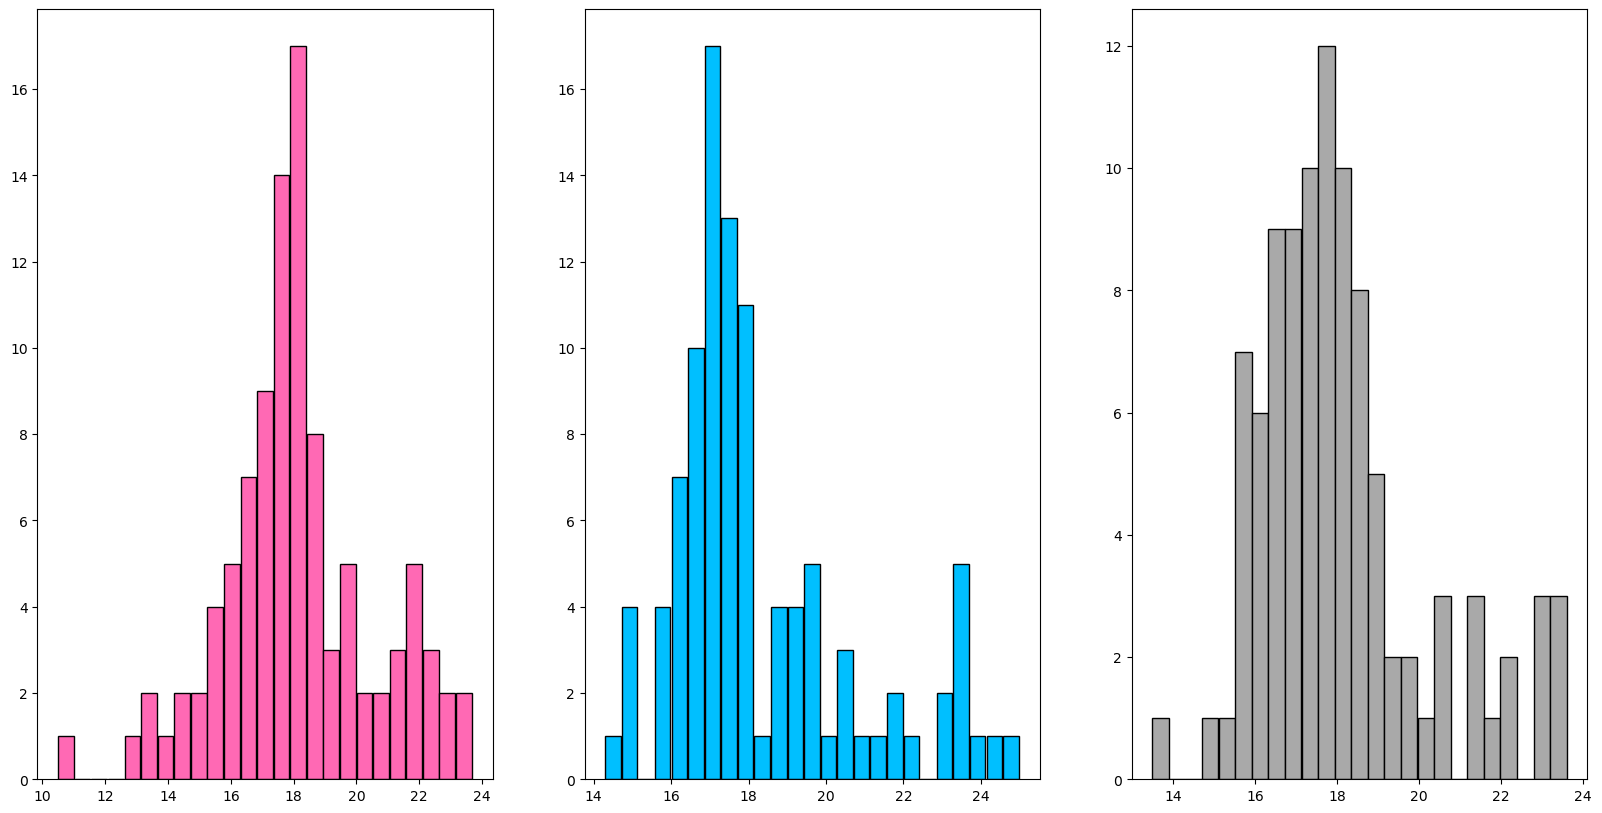

In [172]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.hist(simple_sample, bins=25, width=0.5, color='hotpink', edgecolor='black')

plt.subplot(1, 3, 2)
plt.hist(cluster_sample, bins=25, width=0.4, color='deepskyblue', edgecolor='black')

plt.subplot(1, 3, 3)
plt.hist(stratum_sample, bins=25, width=0.4, color='darkgrey', edgecolor='black')
#plt.legend(stratum_sample)
plt.show()